# **Análisis exploratorio de datos del estudio**

## **Librerías**

In [28]:
from eda_auxiliary_functions import (make_general_histograms, 
                                 plot_stacked_barchart, 
                                 make_general_boxplots, 
                                 make_seasonal_decomposition,
                                 make_categories_pie_chart,
                                 count_outliers,
                                 replace_outliers)
import warnings
import pandas as pd

In [29]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
warnings.filterwarnings('ignore')

## **Análisis de dataset de generación / demanda de energía eléctrica en España**

### **Estructura general del dataset**

In [30]:
energy = pd.read_csv("energy_dataset.csv")
print("Shape:", energy.shape)
energy.head(3)

Shape: (35064, 29)


,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48


### **Tipos de datos**

In [31]:
pd.DataFrame(energy.dtypes).T

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


**Observación:** La columna de tiempo "time" no está en formato *datetime*, se procede a convertirla

In [32]:
energy["time"] = pd.to_datetime(energy["time"].str[0:-6])

### **Distribuciones generales de las variables numéricas**

In [33]:
energy.describe()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35064,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,35045.000000,35045.000000,35046.000000,35045.0,35047.000000,35046.000000,35046.000000,35046.000000,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,2016-12-31 12:05:21.560574976,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,475.577343,972.116108,2605.114735,0.0,6263.907039,60.228585,85.639702,1432.665925,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
min,2015-01-01 00:00:00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,2016-01-01 05:45:00,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,0.000000,637.000000,1077.250000,0.0,5760.000000,53.000000,73.000000,71.000000,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,2016-12-31 11:30:00,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,68.000000,906.000000,2164.000000,0.0,6566.000000,57.000000,88.000000,616.000000,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,2017-12-31 17:15:00,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,616.000000,1250.000000,3757.000000,0.0,7025.000000,80.000000,97.000000,2578.000000,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,2018-12-31 23:00:00,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,4523.000000,2000.000000,9728.000000,0.0,7117.000000,106.000000,119.000000,5792.000000,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000
std,NaN,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,792.406614,400.777536,1835.199745,0.0,839.667958,20.238381,14.077554,1680.119887,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083


**Observación:** 
1. Las siguientes columnas están completamente conformadas por valores cero o nulo:
* 'generation fossil coal-derived gas'
* 'generation fossil oil shale'
* 'generation fossil peat'
* 'generation geothermal' 
* 'generation hydro pumped storage aggregated'
* 'generation marine'
* 'generation wind offshore'
* 'forecast wind offshore eday ahead'
<br><br>

2. Dado que el objetivo del proyecto consta de realizar predicciones acorde a diversos lapsos de anticipación al mercado mayorista de electricidad, se opta por omitir las columnas que no hacen referencia a las condiciones del instante en que se realizaría la predicción real:
* 'forecast solar day ahead'
* 'forecast wind onshore day ahead'
* 'price actual'
* 'price day ahead'

<br>
Por lo tanto, se procede a eliminarlas las columnas previamente mencionadas no agregar ninguna información relevante al caso de estudio.

In [34]:
useless_columns = ['generation fossil coal-derived gas', 'generation fossil oil shale', 'generation fossil peat', 'generation geothermal' , 
                   'generation hydro pumped storage aggregated', 'generation marine', 'generation wind offshore', 'forecast wind offshore eday ahead',
                   'forecast solar day ahead', 'forecast wind onshore day ahead', 'price actual', 'price day ahead']
energy = energy.drop(useless_columns, axis=1)
print("Shape:", energy.shape)

Shape: (35064, 17)


### **Distribuciones generales de variables numéricas (gráfico)**

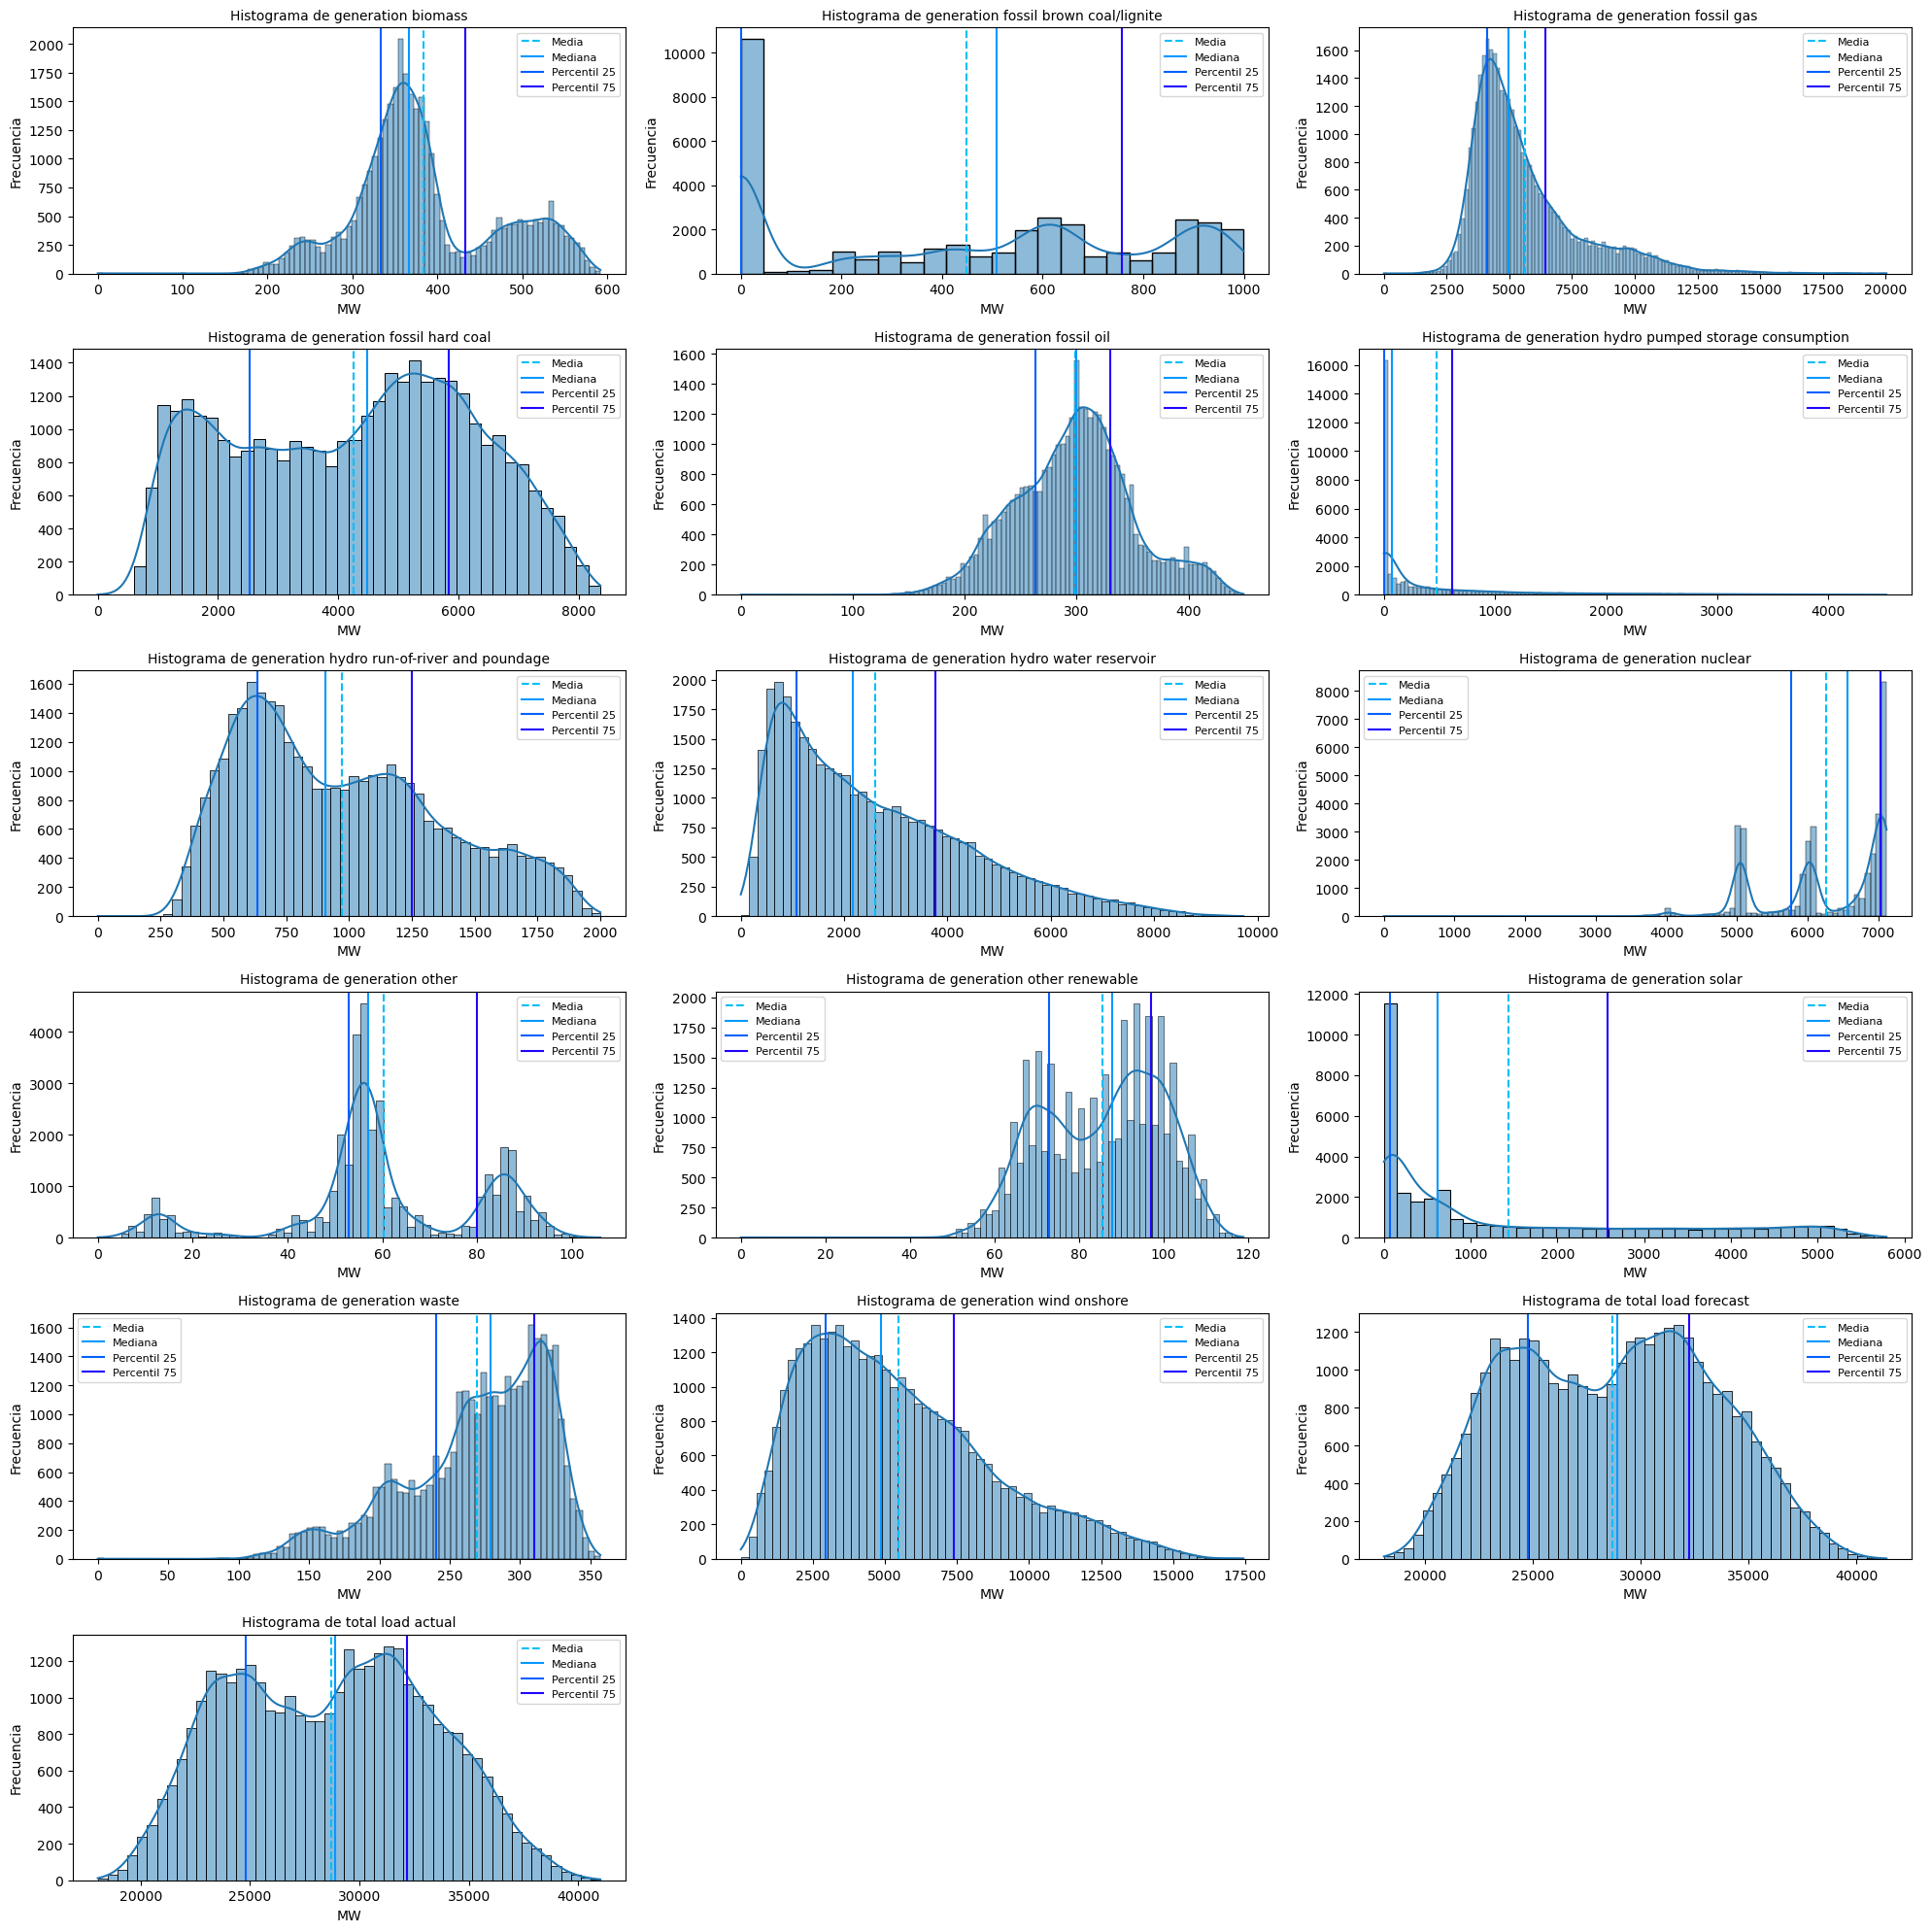

In [35]:
make_general_histograms(energy, figsize=(20, 20), xlabel="MW", group_cols_N=3)

### **Identificación y reemplazo de datos atípicos**

###
**Identificación**

Se buscan datos atípicos en múltiples columnas por fuera de 1.5 IQR.

In [36]:
count_outliers(energy)

,column,outlier_count
5,generation hydro pumped storage consumption,3762
2,generation fossil gas,2185
9,generation other,1267
13,generation wind onshore,379
7,generation hydro water reservoir,343
...,...,...
3,generation fossil hard coal,0
6,generation hydro run-of-river and poundage,0
11,generation solar,0
14,total load forecast,0


###
**Reemplazo**

Se procede a reemplazarlas por la **media** de la distribución.

In [37]:
energy = replace_outliers(energy)

### **Acumulación mensual por tipo de generación de energía**

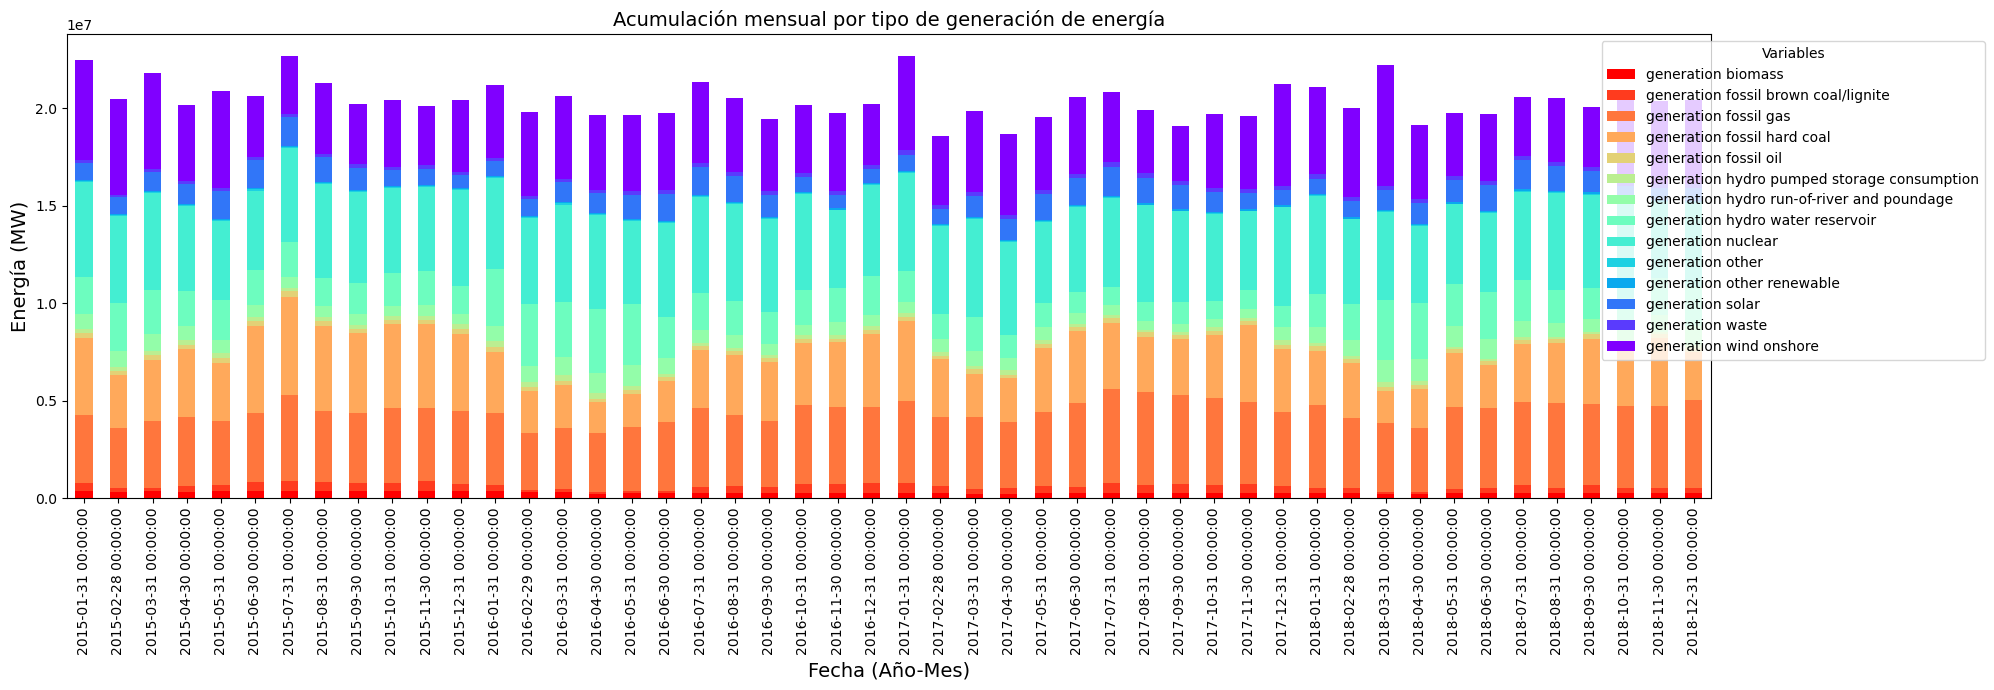

In [38]:
generation_cols = [value for value in energy.columns.tolist() if 'generation' in value]
plot_stacked_barchart(energy, generation_cols, frequency='M', figsize=(20, 7), 
                      title="Acumulación mensual por tipo de generación de energía", 
                      ylabel="Energía (MW)", 
                      xlabel="Fecha (Año-Mes)")

### **Descomposición estacional de demanda total de energía**

####
**Descomposición anual**

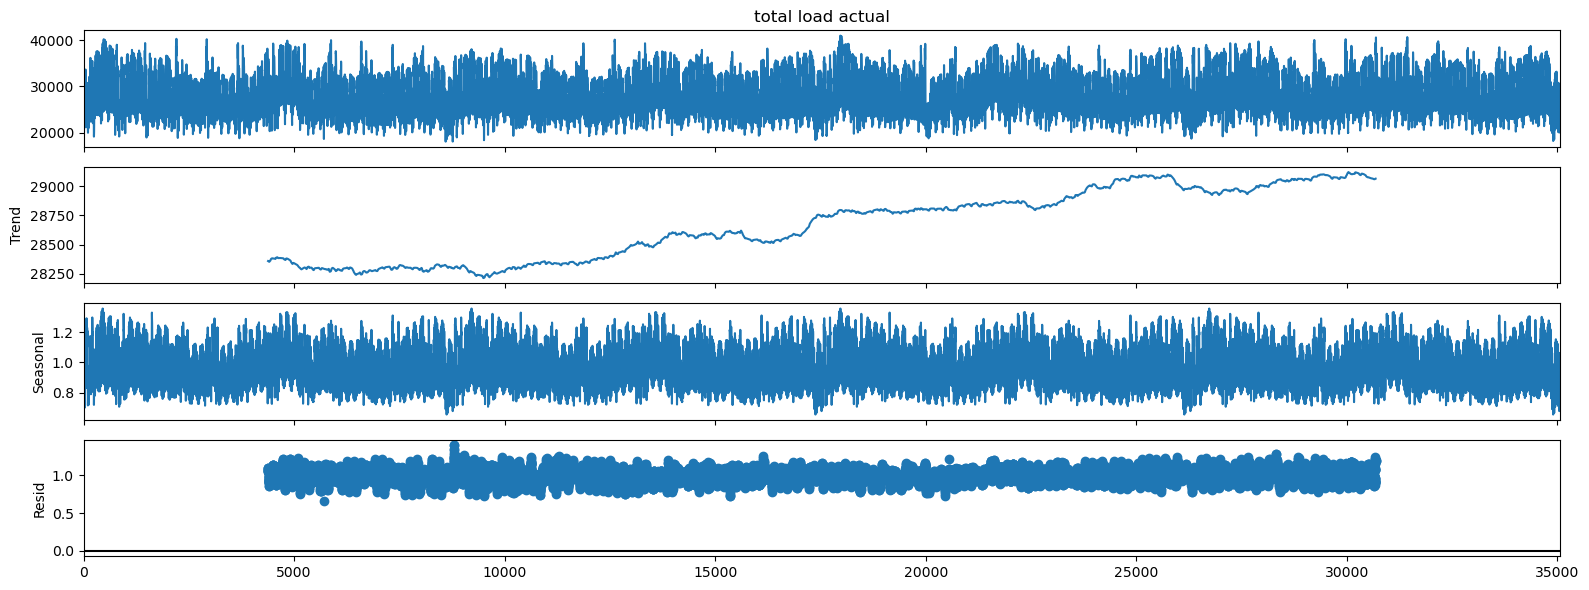

In [39]:
input_data = energy["total load actual"].fillna(method="ffill")
make_seasonal_decomposition(input_data, model='multiplicative', period=365*24)

####
**Descomposición semanal**

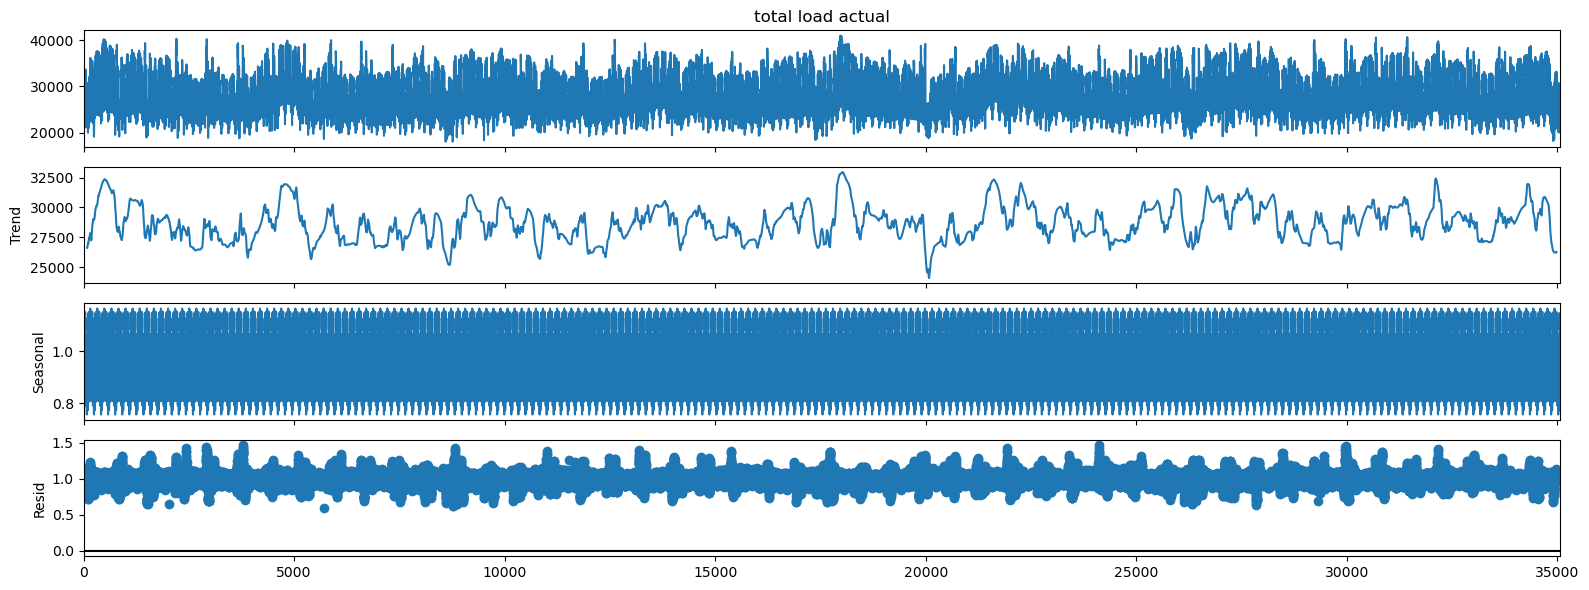

In [40]:
input_data = energy["total load actual"].fillna(method="ffill")
make_seasonal_decomposition(input_data, model='multiplicative', period=7*24)

### **Escritura de dataset limpio**

In [41]:
energy.to_pickle('energy_clean_dataset.pkl')

==============================================================================================================================

## **Análisis de dataset de información meteorológica / climática en España**

### **Estructura general del dataset**

In [42]:
weather = pd.read_csv("weather_features.csv")
print("Shape:", weather.shape)
weather.head(3)

Shape: (178396, 17)


,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


### **Tipos de datos**

In [43]:
pd.DataFrame(weather.dtypes).T

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,object,object,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,int64,int64,object,object,object


**Observación:** La columna de tiempo "dt_iso" no está en formato *datetime*, se procede a convertirla y cambiar su nombre a "time"

In [44]:
weather["time"] = pd.to_datetime(weather["dt_iso"].str[0:-6])
weather = weather.drop("dt_iso", axis=1)

### **Distribuciones generales de las columnas numéricas**

In [45]:
weather.describe()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,time
count,178396.000000,178396.000000,178396.000000,1.783960e+05,178396.000000,178396.00000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000,178396
mean,289.618605,288.330442,291.091267,1.069261e+03,68.423457,2.47056,166.591190,0.075492,0.000380,0.004763,25.073292,759.831902,2017-01-03 19:53:15.394515968
min,262.240000,262.240000,262.240000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000,2015-01-01 00:00:00
25%,283.670000,282.483602,284.650000,1.013000e+03,53.000000,1.00000,55.000000,0.000000,0.000000,0.000000,0.000000,800.000000,2016-01-05 06:00:00
50%,289.150000,288.150000,290.150000,1.018000e+03,72.000000,2.00000,177.000000,0.000000,0.000000,0.000000,20.000000,800.000000,2017-01-05 06:00:00
75%,295.150000,293.730125,297.150000,1.022000e+03,87.000000,4.00000,270.000000,0.000000,0.000000,0.000000,40.000000,801.000000,2018-01-04 21:00:00
max,315.600000,315.150000,321.150000,1.008371e+06,100.000000,133.00000,360.000000,12.000000,2.315000,21.500000,100.000000,804.000000,2018-12-31 23:00:00
std,8.026199,7.955491,8.612454,5.969632e+03,21.902888,2.09591,116.611927,0.398847,0.007288,0.222604,30.774129,108.733223,NaN


### **Distribuciones generales de variables numéricas (gráfico)**

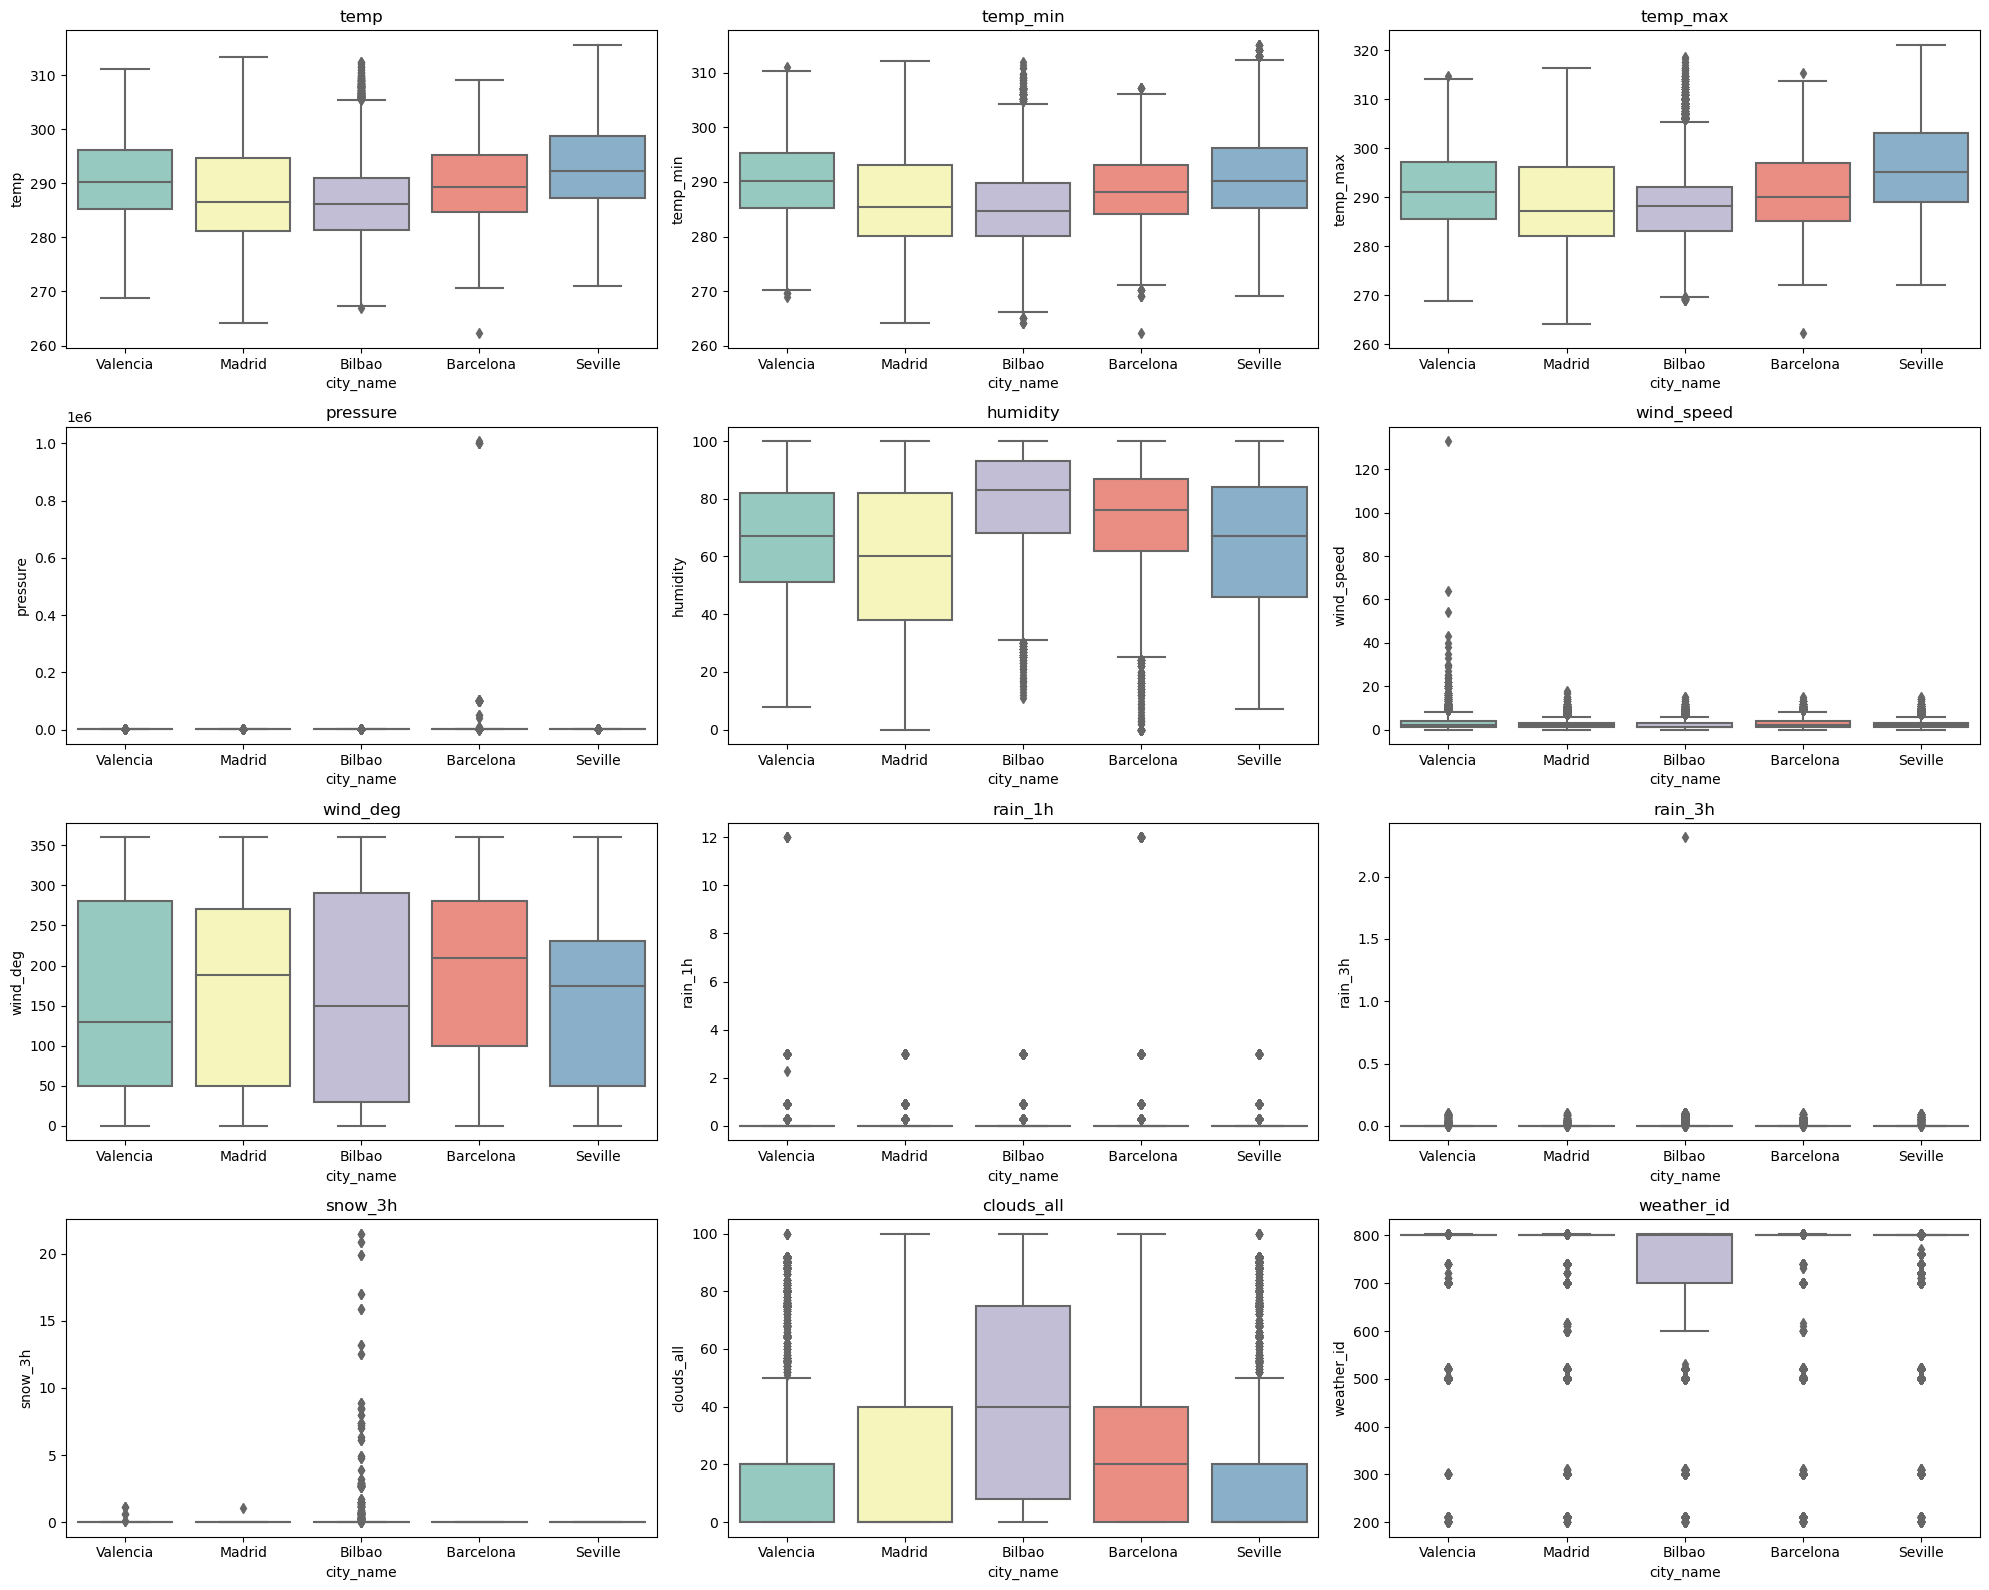

In [46]:
make_general_boxplots(weather, figsize=(20, 16))

### **Identificación y reemplazo de datos atípicos**


###
**Identificación**

Se buscan datos atípicos en múltiples columnas por fuera de 1.5 IQR.

In [47]:
count_outliers(weather)

,column,outlier_count
11,weather_id,47665
7,rain_1h,19388
3,pressure,11830
5,wind_speed,2425
8,rain_3h,1855
...,...,...
9,snow_3h,267
0,temp,196
4,humidity,63
6,wind_deg,0


###
**Reemplazo**

Se procede a reemplazarlas por la **media** de la distribución.

In [48]:
weather = replace_outliers(weather)

### **Descomposición estacional de mediciones meteorológicas**

####
**Temperatura**

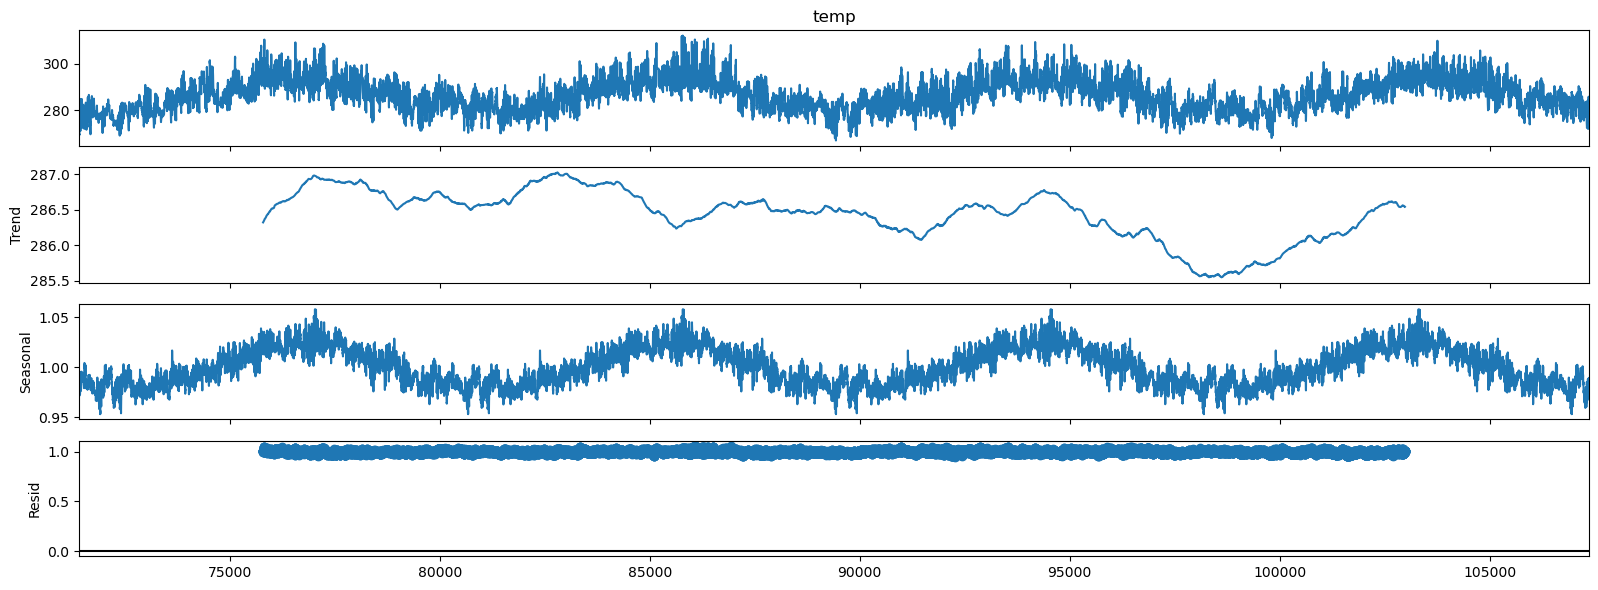

In [49]:
input_data = weather[weather["city_name"]=="Bilbao"]["temp"]
make_seasonal_decomposition(input_data, model='multiplicative', period=365*24)

####
**Porcentaje de nubes**

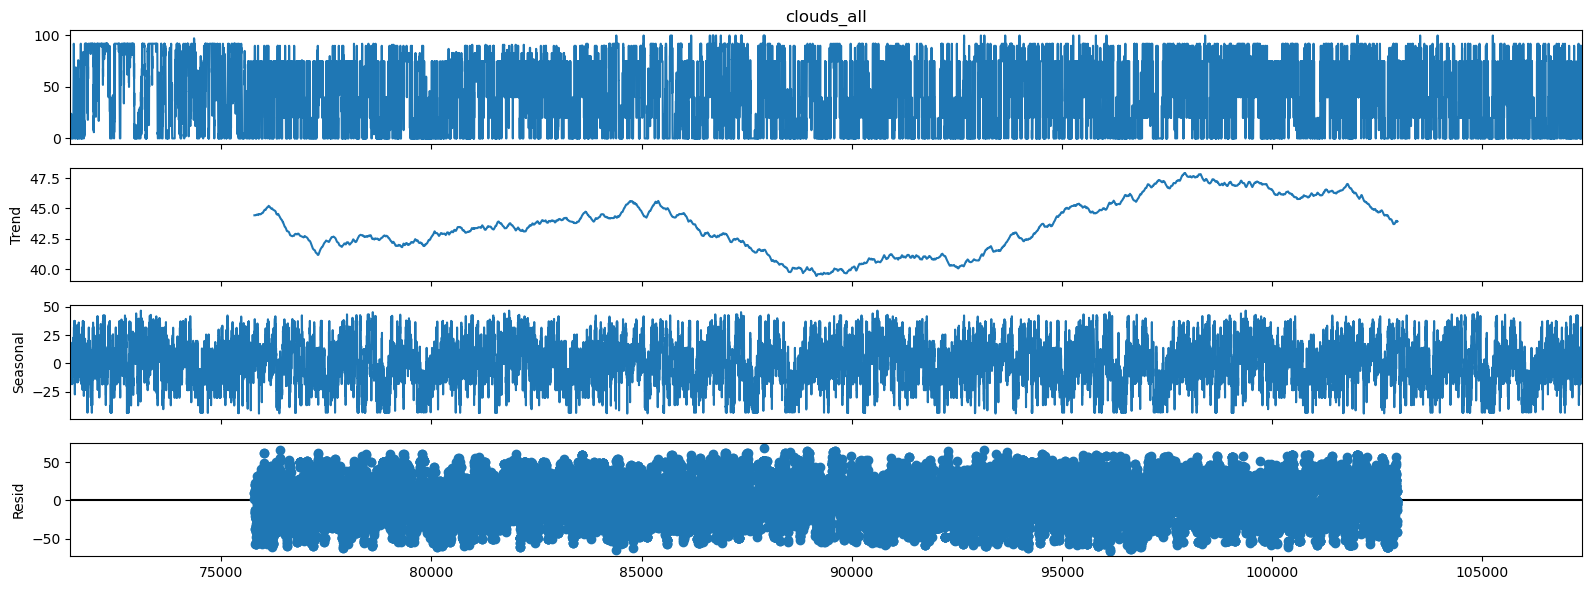

In [50]:
input_data = weather[weather["city_name"]=="Bilbao"]["clouds_all"]
make_seasonal_decomposition(input_data, model="additive", period=365*24)

### **Distribuciones generales de las columnas categóricas (textuales)**

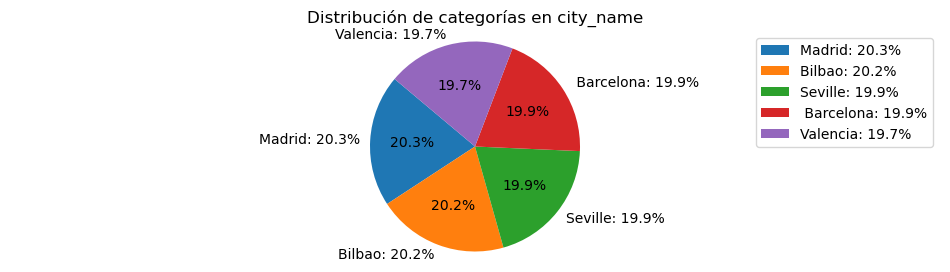

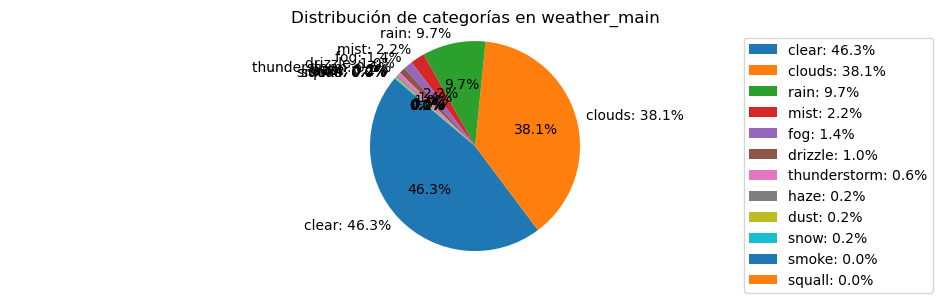

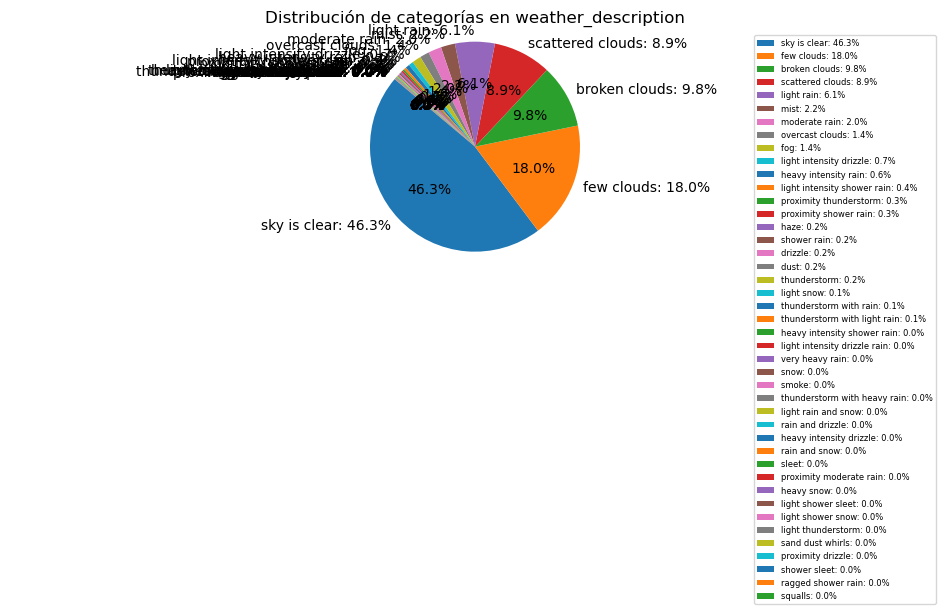

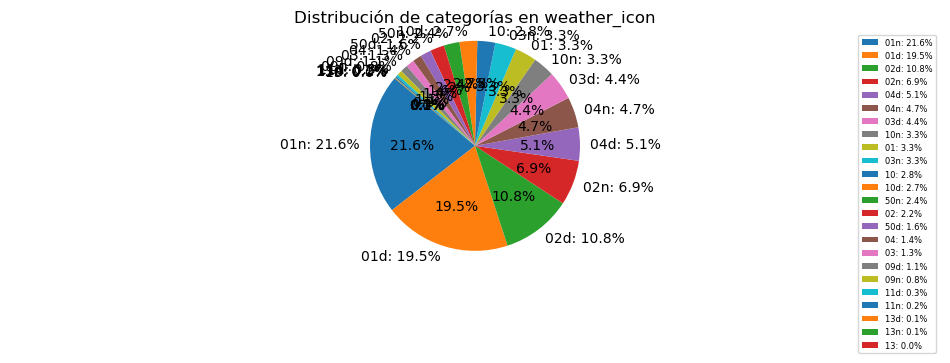

In [51]:
make_categories_pie_chart(weather)

**Observación:**

1. La variable *'weather_main'* tiene 12 categorías, pero solo 3 de de ellas tienen representación por encima del 5%. Por lo que el resto de las categorías se asignarán a una nueva categoría *'other'*.

2. La variable *'weather_description'* tiene 43 categorías, pero solo 5 de de ellas tienen representación por encima del 5%. Por lo que el resto de las categorías se asignarán a una nueva categoría *'other'*.

3. Las variables *'weather_icon'* y weather_id no tienen un significado aplicativo de los fenómenos a modelar, por lo que serán eliminada.

In [52]:
weather.loc[~weather["weather_main"].isin(['clear', 'clouds', 'rain']), 'weather_main'] = 'other'

weather.loc[~weather["weather_description"].isin(['sky is clear', 'few clouds', 'broken clouds', 
                                                  'scattered clouds', 'light rain']), 'weather_description'] = 'other'
weather = weather.drop(["weather_icon", "weather_id"], axis = 1)

### **Escritura de dataset limpio**

In [53]:
weather.to_pickle('weather_clean_dataset.pkl')